# Knowledge Networks in South Korea

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,281 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126315 files and dire

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import sys
import ast

import plotly.express as px

#import nltk
#from nltk.corpus import stopwords
#import spacy

import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd

import networkx as nx
from networkx.algorithms.components.connected import connected_components

import json
import dask.bag as db

import sys
import os

sys.path.append("..")

from pathlib import Path

import json


from itertools import combinations
from collections import Counter
from itertools import chain
import random

from tqdm.notebook import tqdm, trange
import time    # to be used in loop iterations

import multiprocessing
import smart_open

#from gensim.models.word2vec import Word2Vec

#from pyvis.network import Network

#from IPython.core.display import display, HTML

#from sklearn.metrics import pairwise_distances
#from sklearn.metrics.pairwise import cosine_similarity,cosine_distances
#from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Affiliation Data Preprocessing

In [ ]:
# data import to merge two dataframes (df1 : address info / df2 : kor name info)

aff_add_df = pd.read_csv("/content/drive/MyDrive/south korea data/affiliations.csv")
aff_kor = pd.read_csv("/content/drive/MyDrive/south korea data/aff(kor).csv")
aff_kor = aff_kor.rename(columns={'aff':'Affiliations'})

print(aff_add_df.head())
print(aff_kor.head())

                      Affiliations  Count              address
0  Seoul National University (SNU)  60557      서울특별시 관악구 관악로 1
1                Yonsei University  37565    서울특별시 서대문구 연세로 50
2   Sungkyunkwan University (SKKU)  29980  서울특별시 종로구 성균관로 25-2
3                 Korea University  25049    서울특별시 성북구 안암로 145
4  Yonsei University Health System  19488  서울특별시 서대문구 연세로 50-1
                      Affiliations aff_in_kor  address
0  Seoul National University (SNU)      서울대학교      NaN
1                Yonsei University      연세대학교      NaN
2   Sungkyunkwan University (SKKU)     성균관대학교      NaN
3                 Korea University      고려대학교      NaN
4  Yonsei University Health System      연세의료원      NaN


In [ ]:
merged_df = pd.merge(aff_add_df, aff_kor, on='Affiliations', how='right')
merged_df = merged_df.drop_duplicates(subset=['Affiliations'])
merged_df = merged_df.drop('address_y', axis=1)
merged_df = merged_df.rename(columns={'address_x': 'address', 'aff_in_kor': 'Affiliations(kor)'})
merged_df = merged_df[['Affiliations', 'Affiliations(kor)', 'address', 'Count']]
merged_df

Affiliations Affiliations(kor)  \
0                      Seoul National University (SNU)             서울대학교   
1                                    Yonsei University             연세대학교   
2                       Sungkyunkwan University (SKKU)            성균관대학교   
3                                     Korea University             고려대학교   
4                      Yonsei University Health System             연세의료원   
..                                                 ...               ...   
188                          World Institute of Kimchi           세계김치연구소   
189                                    Samsung Display           삼성디스플레이   
190                                     LG Electronics              LG전자   
191                       Korea Polytechnic University           한국공학대학교   
192  National Institute of Food & Drug Safety Evalu...        식품의약품안전평가원   

                         address    Count  
0                서울특별시 관악구 관악로 1  60557.0  
1              서울특별시 서대문구 연세로 50  37565.0  
2            서울특별시 종로구 성균관로 25-2  29980.0  
3              서울특별시 성북구 안암로 145  25049.0  
4            서울특별시 서대문구 연세로 50-1  19488.0  
..                           ...      ...  
188              광주광역시 남구 김치로 86    226.0  
189            경기도 용인시 기흥구 삼성로 1    224.0  
190           서울시 영등포구 여의대로 128     218.0  
191            경기도 시흥시 산기대학로 237    211.0  
192  충청북도 청주시 흥덕구 오송읍 오송생명2로 187    204.0  

[193 rows x 4 columns]

In [ ]:
merged_df.to_excel("/content/drive/MyDrive/south korea data/merged_affiliations.xlsx")

# Data Import

In [ ]:
combined_2021 = pd.read_csv("/content/drive/MyDrive/south korea data/combined data/combined_2021.csv")
combined_2022 = pd.read_csv("/content/drive/MyDrive/south korea data/combined data/combined_2022.csv")
combined_2023 = pd.read_csv("/content/drive/MyDrive/south korea data/combined data/combined_2023.csv")

<ipython-input-5-65b63307e364>:1: DtypeWarning: Columns (4,11,15,16,17,19,48,50,59) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_2021 = pd.read_csv("/content/drive/MyDrive/south korea data/combined data/combined_2021.csv")
<ipython-input-5-65b63307e364>:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_2022 = pd.read_csv("/content/drive/MyDrive/south korea data/combined data/combined_2022.csv")
<ipython-input-5-65b63307e364>:3: DtypeWarning: Columns (19,48) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_2023 = pd.read_csv("/content/drive/MyDrive/south korea data/combined data/combined_2023.csv")


In [ ]:
# Create a list of your DataFrames
dataframes = [
    combined_2021,
    combined_2022,
    combined_2023
]

# Concatenate the DataFrames vertically (along rows)
combined_df = pd.concat(dataframes, ignore_index=True)
del combined_df['Unnamed: 0']

# View the first few rows of the combined DataFrame
combined_df

Publication Type                                            Authors  \
0                     J  Zhang, GC; Zhao, XH; Jin, X; Zhao, ZJ; Ren, YM...   
1                     J  Pak, HK; Kim, YW; Nam, B; Lee, AN; Roh, J; Gil...   
2                     J  Sakthivel, R; Harshavarthini, S; Almakhles, DJ...   
3                     J  Jang, M; Ko, DJ; Choi, YJ; Yan, BY; Jin, XZ; K...   
4                     J  Park, BY; Park, H; Morys, F; Kim, M; Byeon, K;...   
...                 ...                                                ...   
260935                J  Choi, JC; Jung, SW; Choi, IY; Kang, YL; Lee, D...   
260936                J  Fang, X; Bang, S; Tanga, BM; Seo, C; Zhou, D; ...   
260937                J                               Hastuti, MI; Min, KH   
260938                J  Ismail, KBM; Kumar, MA; Mahalingam, S; Kim, J;...   
260939                J           Kim, W; Kim, W; Bang, D; Park, J; Lee, W   

        Book Authors Book Editors  Book Group Authors  \
0                NaN          NaN                 NaN   
1                NaN          NaN                 NaN   
2                NaN          NaN                 NaN   
3                NaN          NaN                 NaN   
4                NaN          NaN                 NaN   
...              ...          ...                 ...   
260935           NaN          NaN                 NaN   
260936           NaN          NaN                 NaN   
260937           NaN          NaN                 NaN   
260938           NaN          NaN                 NaN   
260939           NaN          NaN                 NaN   

                                        Author Full Names  \
0       Zhang, Guangchen; Zhao, Xiuhu; Jin, Xiao; Zhao...   
1       Pak, Hyo-Kyung; Kim, Yong-Woo; Nam, Bora; Lee,...   
2       Sakthivel, R.; Harshavarthini, S.; Almakhles, ...   
3       Jang, Myeongseok; Ko, Dongjin; Choi, Yejung; Y...   
4       Park, Bo-yong; Park, Hyunjin; Morys, Filip; Ki...   
...                                                   ...   
260935  Choi, Jong-Chul; Jung, Sung-Won; Choi, In-Yeon...   
260936  Fang, Xun; Bang, Seonggyu; Tanga, Bereket Moll...   
260937               Hastuti, Miranti Indri; Min, Ki-Hong   
260938  Ismail, Kamal Batcha Mohamed; Arun Kumar, Mano...   
260939  Kim, Woong; Kim, Woochang; Bang, Doyeon; Park,...   

        Book Author Full Names Group Authors  \
0                          NaN           NaN   
1                          NaN           NaN   
2                          NaN           NaN   
3                          NaN           NaN   
4                          NaN           NaN   
...                        ...           ...   
260935                     NaN           NaN   
260936                     NaN           NaN   
260937                     NaN           NaN   
260938                     NaN           NaN   
260939                     NaN           NaN   

                                            Article Title  \
0       Ionic-liquid-modified TiO2 spheres and their e...   
1       The Migration of Human Follicular Dendritic Ce...   
2       Design of uncertainty and disturbance estimato...   
3       Self-organized hierarchically porous carbon co...   
4       Inter-individual body mass variations relate t...   
...                                                   ...   
260935  Rottlerin-Liposome Inhibits the Endocytosis of...   
260936  Oviduct epithelial cell-derived extracellular ...   
260937  Impact of Assimilating GK-2A All-Sky Radiance ...   
260938  Recent Advances in Molybdenum Disulfide and It...   
260939  A Simple Method to Fabricate the Highly Sensit...   

                                  Source Title  ... Web of Science Index  \
0                 JOURNAL OF MOLECULAR LIQUIDS  ...                  NaN   
1               JOURNAL OF IMMUNOLOGY RESEARCH  ...                  NaN   
2          IET CONTROL THEORY AND APPLICATIONS  ...                  NaN   
3       JOURNAL OF ELECTROANALYTICAL C

In [ ]:
combined_df['Research Areas']

0                                        Chemistry; Physics
1                                                Immunology
2         Automation & Control Systems; Engineering; Ins...
3                               Chemistry; Electrochemistry
4         Life Sciences & Biomedicine - Other Topics; Sc...
                                ...                        
260935                                  Veterinary Sciences
260936           Oncology; Research & Experimental Medicine
260937    Environmental Sciences & Ecology; Geology; Rem...
260938    Chemistry; Materials Science; Metallurgy & Met...
260939    Chemistry; Electrochemistry; Instruments & Ins...
Name: Research Areas, Length: 260940, dtype: object

In [ ]:
cat_df = pd.read_excel("/content/drive/MyDrive/south korea data/Aggregated Categories.xlsx")
del cat_df['Geography']
cat_df["Research Area"] = cat_df["Research Area"].str[:-2]
cat_df

Research Area  \
0                                    Chemistry; Physics   
1                                            Immunology   
2     Automation & Control Systems; Engineering; Ins...   
3                           Chemistry; Electrochemistry   
4     Life Sciences & Biomedicine - Other Topics; Sc...   
...                                                 ...   
1726                               Agriculture; Geology   
1727    Geography; Public Administration; Urban Studies   
1728        Energy & Fuels; Engineering; Transportation   
1729  Biochemistry & Molecular Biology; Cell Biology...   
1730                       Forestry; Genetics & Heredit   

        Web of Science categories  
0               Physical Sciences  
1     Life Sciences & Biomedicine  
2                      Technology  
3               Physical Sciences  
4     Life Sciences & Biomedicine  
...                           ...  
1726           Convergent Studies  
1727              Social Sciences  
1728                   Technology  
1729  Life Sciences & Biomedicine  
1730  Life Sciences & Biomedicine  

[1731 rows x 2 columns]

In [ ]:
cat_df['Research Area']

0                                      Chemistry; Physics
1                                              Immunology
2       Automation & Control Systems; Engineering; Ins...
3                             Chemistry; Electrochemistry
4       Life Sciences & Biomedicine - Other Topics; Sc...
                              ...                        
1726                                 Agriculture; Geology
1727      Geography; Public Administration; Urban Studies
1728          Energy & Fuels; Engineering; Transportation
1729    Biochemistry & Molecular Biology; Cell Biology...
1730                         Forestry; Genetics & Heredit
Name: Research Area, Length: 1731, dtype: object

In [ ]:
dictionary = dict(zip(cat_df["Research Area"], cat_df["Web of Science categories"]))
dictionary

{'Chemistry; Physics': 'Physical Sciences',
 'Immunology': 'Life Sciences & Biomedicine',
 'Automation & Control Systems; Engineering; Instruments & Instrumentation': 'Technology',
 'Chemistry; Electrochemistry': 'Physical Sciences',
 'Life Sciences & Biomedicine - Other Topics; Science & Technology - Other Topics': 'Life Sciences & Biomedicine',
 'Engineering; Environmental Sciences & Ecology': 'Technology',
 'Environmental Sciences & Ecology; Geology': 'Life Sciences & Biomedicine',
 'Science & Technology - Other Topics': 'Technology',
 'Science & Technology - Other Topics; Environmental Sciences & Ecology': 'Technology',
 'General & Internal Medicine': 'Life Sciences & Biomedicine',
 'Engineering; Science & Technology - Other Topics; Materials Science': 'Technology',
 'Mathematics; Science & Technology - Other Topics': 'Physical Sciences',
 'Chemistry; Science & Technology - Other Topics; Materials Science; Physics': 'Physical Sciences',
 'Oncology; Surgery': 'Life Sciences & Biomed

In [ ]:
import pandas as pd

# Create a new column named "WOS Categories" based on the dictionary
combined_df["WOS Categories"] = combined_df["Research Areas"].map(dictionary)
print(combined_df['WOS Categories'].unique())
print(len(combined_df['WOS Categories'].unique()))

['Physical Sciences' 'Life Sciences & Biomedicine' 'Technology'
 'Social Sciences' 'Convergent Studies' 'Applied Studies' nan
 'Arts & Humanities' 'Humanities & Social Sciences' 'APplied Studies']
10


In [ ]:
# Try converting the column to string (assuming it's convertible)
try:
  combined_df['WOS Categories'] = combined_df['WOS Categories'].astype(str)
except (AttributeError, TypeError):
  print("Warning: 'WOS Categories' column might not be string type and conversion failed.")

# Fix capitalization for values exactly matching "APplied Studies" (case-sensitive)
combined_df.loc[combined_df['WOS Categories'] == "APplied Studies", 'WOS Categories'] = "Applied Studies"

# Optional: Fix for variations using regular expressions (case-insensitive)
# combined_df['WOS Categories'] = combined_df['WOS Categories'].str.replace('APplied Studies', 'Applied Studies', case=False)


In [ ]:
print(combined_df['WOS Categories'].unique())
print(len(combined_df['WOS Categories'].unique()))

['Physical Sciences' 'Life Sciences & Biomedicine' 'Technology'
 'Social Sciences' 'Convergent Studies' 'Applied Studies' 'nan'
 'Arts & Humanities' 'Humanities & Social Sciences']
9


In [ ]:
# Dividing the dataframes
phys_df = combined_df[combined_df['WOS Categories'] == 'Physical Sciences']
lifes_df = combined_df[combined_df['WOS Categories'] == 'Life Sciences & Biomedicine']
tech_df = combined_df[combined_df['WOS Categories'] == 'Technology']
social_df = combined_df[combined_df['WOS Categories'] == 'Social Sciences']
applied_df = combined_df[combined_df['WOS Categories'] == 'Applied Studies']
convergent_df = combined_df[combined_df['WOS Categories'] == 'Convergent Studies']
arts_df = combined_df[combined_df['WOS Categories'] == 'Arts & Humanities']
human_df = combined_df[combined_df['WOS Categories'] == 'Humanities & Social Sciences']


# print the dataframe lengths
print(len(phys_df))
print(len(lifes_df))
print(len(tech_df))
print(len(social_df))
print(len(applied_df))
print(len(convergent_df))
print(len(arts_df))
print(len(human_df))

38115
81316
68629
9913
1493
18920
1046
188


In [ ]:
len(combined_df)

260940

In [ ]:
combined_df["Research Areas"].isnull().sum()

np.int64(40003)

In [ ]:
combined_df['WOS Categories'].isnull().sum()

np.int64(0)

In [ ]:
combined_df['Research Areas']

0                                        Chemistry; Physics
1                                                Immunology
2         Automation & Control Systems; Engineering; Ins...
3                               Chemistry; Electrochemistry
4         Life Sciences & Biomedicine - Other Topics; Sc...
                                ...                        
260935                                  Veterinary Sciences
260936           Oncology; Research & Experimental Medicine
260937    Environmental Sciences & Ecology; Geology; Rem...
260938    Chemistry; Materials Science; Metallurgy & Met...
260939    Chemistry; Electrochemistry; Instruments & Ins...
Name: Research Areas, Length: 260940, dtype: object

# Data import for further analysis

In [ ]:
aff_df = pd.read_csv("/content/drive/MyDrive/지식 다중심성 /시각화 (new!)/affiliations_SGG/affiliations_SGG.csv")
aff_df

Affiliations  Count  \
0                      Seoul National University (SNU)  60557   
1                                    Yonsei University  37565   
2                       Sungkyunkwan University (SKKU)  29980   
3                                     Korea University  25049   
4                      Yonsei University Health System  19488   
..                                                 ...    ...   
190                          World Institute of Kimchi    226   
191                                    Samsung Display    224   
192                                     LG Electronics    218   
193                       Korea Polytechnic University    211   
194  National Institute of Food & Drug Safety Evalu...    204   

                         address   Latitude   Longitude  ADM_SECT_C  \
0                서울특별시 관악구 관악로 1  37.480967  126.953148       11620   
1              서울특별시 서대문구 연세로 50  37.564699  126.939497       11410   
2            서울특별시 종로구 성균관로 25-2  37.588392  126.992215       11110   
3              서울특별시 성북구 안암로 145  37.588750  127.032374       11290   
4            서울특별시 서대문구 연세로 50-1  37.564699  126.939497       11410   
..                           ...        ...         ...         ...   
190              광주광역시 남구 김치로 86  35.108186  126.866015       29155   
191            경기도 용인시 기흥구 삼성로 1  37.230171  127.080358       41463   
192            서울시 영등포구 여의대로 128  37.527885  126.929230       11560   
193            경기도 시흥시 산기대학로 237  37.340174  126.733593       41390   
194  충청북도 청주시 흥덕구 오송읍 오송생명2로 187  36.639432  127.330164       43113   

           SGG_NM  SGG_OID  COL_ADM_SE     Shape_Leng    Shape_Area  Between  
0       서울특별시 관악구        1       11620   27650.110757  2.958624e+07      NaN  
1      서울특별시 서대문구        1       11410   22288.195593  1.769703e+07      NaN  
2       서울특별시 종로구       11       11110   28513.149104  2.399337e+07      NaN  
3       서울특별시 성북구        0       11290   31539.613027  2.459729e+07      NaN  
4      서울특별시 서대문구        1       11410   22288.195593  1.769703e+07      NaN  
..            ...      ...         ...            ...           ...      ...  
190      광주광역시 남구        1       29155   56398.849496  6.051950e+07      NaN  
191   경기도 용인시 기흥구        3       41460   49818.096627  8.179184e+07      NaN  
192    서울특별시 영등포구        1       11560   26267.497959  2.451212e+07      NaN  
193       경기도 시흥시        3       41390  111262.195635  1.404492e+08      NaN  
194  충청북도 청주시 흥덕구    32719       43110   76050.730565  1.991080e+08      NaN  

[195 rows x 12 columns]

## Graph Embedding



In [ ]:
from itertools import combinations

def create_affiliation_pairs(df):
    """
    Adds a new column named 'affiliation_pairs' to the DataFrame,
    containing all possible pairs of affiliations from the 'Affiliations' column.

    Args:
        df: The DataFrame containing the 'Affiliations' column.

    Returns:
        The modified DataFrame with the 'affiliation_pairs' column added.
    """

    df['affiliation_pairs'] = df['Affiliations'].apply(
        lambda x: list(combinations(x.split(';'), 2)))
    return df

# Load your data into a DataFrame
data =combined_df.dropna(subset=['Affiliations'])

# Create the affiliation pairs
data = create_affiliation_pairs(data.copy())

# View the first few rows
data

Publication Type                                            Authors  \
0                     J  Zhang, GC; Zhao, XH; Jin, X; Zhao, ZJ; Ren, YM...   
1                     J  Pak, HK; Kim, YW; Nam, B; Lee, AN; Roh, J; Gil...   
2                     J  Sakthivel, R; Harshavarthini, S; Almakhles, DJ...   
3                     J  Jang, M; Ko, DJ; Choi, YJ; Yan, BY; Jin, XZ; K...   
4                     J  Park, BY; Park, H; Morys, F; Kim, M; Byeon, K;...   
...                 ...                                                ...   
260935                J  Choi, JC; Jung, SW; Choi, IY; Kang, YL; Lee, D...   
260936                J  Fang, X; Bang, S; Tanga, BM; Seo, C; Zhou, D; ...   
260937                J                               Hastuti, MI; Min, KH   
260938                J  Ismail, KBM; Kumar, MA; Mahalingam, S; Kim, J;...   
260939                J           Kim, W; Kim, W; Bang, D; Park, J; Lee, W   

        Book Authors Book Editors  Book Group Authors  \
0                NaN          NaN                 NaN   
1                NaN          NaN                 NaN   
2                NaN          NaN                 NaN   
3                NaN          NaN                 NaN   
4                NaN          NaN                 NaN   
...              ...          ...                 ...   
260935           NaN          NaN                 NaN   
260936           NaN          NaN                 NaN   
260937           NaN          NaN                 NaN   
260938           NaN          NaN                 NaN   
260939           NaN          NaN                 NaN   

                                        Author Full Names  \
0       Zhang, Guangchen; Zhao, Xiuhu; Jin, Xiao; Zhao...   
1       Pak, Hyo-Kyung; Kim, Yong-Woo; Nam, Bora; Lee,...   
2       Sakthivel, R.; Harshavarthini, S.; Almakhles, ...   
3       Jang, Myeongseok; Ko, Dongjin; Choi, Yejung; Y...   
4       Park, Bo-yong; Park, Hyunjin; Morys, Filip; Ki...   
...                                                   ...   
260935  Choi, Jong-Chul; Jung, Sung-Won; Choi, In-Yeon...   
260936  Fang, Xun; Bang, Seonggyu; Tanga, Bereket Moll...   
260937               Hastuti, Miranti Indri; Min, Ki-Hong   
260938  Ismail, Kamal Batcha Mohamed; Arun Kumar, Mano...   
260939  Kim, Woong; Kim, Woochang; Bang, Doyeon; Park,...   

        Book Author Full Names Group Authors  \
0                          NaN           NaN   
1                          NaN           NaN   
2                          NaN           NaN   
3                          NaN           NaN   
4                          NaN           NaN   
...                        ...           ...   
260935                     NaN           NaN   
260936                     NaN           NaN   
260937                     NaN           NaN   
260938                     NaN           NaN   
260939                     NaN           NaN   

                                            Article Title  \
0       Ionic-liquid-modified TiO2 spheres and their e...   
1       The Migration of Human Follicular Dendritic Ce...   
2       Design of uncertainty and disturbance estimato...   
3       Self-organized hierarchically porous carbon co...   
4       Inter-individual body mass variations relate t...   
...                                                   ...   
260935  Rottlerin-Liposome Inhibits the Endocytosis of...   
260936  Oviduct epithelial cell-derived extracellular ...   
260937  Impact of Assimilating GK-2A All-Sky Radiance ...   
260938  Recent Advances in Molybdenum Disulfide and It...   
260939  A Simple Method to Fabricate the Highly Sensit...   

                                  Source Title  ... IDS Number  Pubmed Id  \
0                 JOURNAL OF MOLECULAR LIQUIDS  ...        NaN        NaN   
1               JOURNAL OF IMMUNOLOGY RESEARCH  ...        NaN        NaN   
2          IET CONTROL THEORY AND APPLICATIONS  ...        NaN        NaN   
3       JOURNAL OF ELECTROANALYTIC

In [ ]:
#Graph embedding

affiliations_pairs=data['affiliation_pairs'].tolist()
affiliations_edge_list=[item for sublist in affiliations_pairs for item in sublist]
affiliations_weighted_edge_list=list(Counter(affiliations_edge_list).items())
affiliations_weighted_edge_list=[(row[0][0],row[0][1],row[1]) for idx,row in enumerate(affiliations_weighted_edge_list)]
affiliations_weighted_edge_list[0:10]

G=nx.Graph()
G.add_weighted_edges_from(affiliations_weighted_edge_list)

#Graph Statistics
print("Number of Nodes in Affiliation Graph ",len(G.nodes()))
print("Number of Edges in Affiliation Graph ",len(G.edges()))

Number of Nodes in Affiliation Graph  14397
Number of Edges in Affiliation Graph  2230366


In [ ]:
# making a list of affiliations that contributed for knowledge

aff_list = aff_df['Affiliations'].unique().tolist()
aff_list

['Seoul National University (SNU)',
 'Yonsei University',
 'Sungkyunkwan University (SKKU)',
 'Korea University',
 'Yonsei University Health System',
 'Hanyang University',
 'Kyung Hee University',
 'Pusan National University',
 'Kyungpook National University',
 'University of Ulsan',
 'Catholic University of Korea',
 'Chonnam National University',
 'Korea Advanced Institute of Science & Technology (KAIST)',
 'Seoul National University Hospital',
 'Samsung Medical Center',
 'Jeonbuk National University',
 'Chungnam National University',
 'Chung Ang University',
 'Gyeongsang National University',
 'Yeungnam University',
 'Pohang University of Science & Technology (POSTECH)',
 'Gachon University',
 'Korea University Medicine (KU Medicine)',
 'Ewha Womans University',
 'Sejong University',
 'Hallym University',
 'Kangwon National University',
 'Konkuk University',
 'Ajou University',
 'Inha University',
 'Korea Institute of Science & Technology (KIST)',
 'Dongguk University',
 'Chungbuk N

In [ ]:
len(aff_list)

195

# SGG Network Building

In [ ]:
import pandas as pd
import networkx as nx

# Assuming your DataFrame is named 'aff_df' and the column containing iso3 codes is named 'iso3'
node_renaming = dict(zip(G.nodes, aff_df['SGG_NM']))

# Rename nodes in the graph 'G' using the mapping dictionary
G = nx.relabel_nodes(G, node_renaming)

node_list = aff_df['SGG_NM'].unique().tolist()
node_list

import networkx as nx

# Assuming you have a graph named G and a list of desired nodes 'node_list'

# Create a subgraph induced by the nodes in the list
subgraph = G.subgraph(node_list)

# Print the number of nodes and edges in the subgraph
print("Number of Nodes in Subgraph:", subgraph.number_of_nodes())
print("Number of Edges in Subgraph:", subgraph.number_of_edges())

Number of Nodes in Subgraph: 95
Number of Edges in Subgraph: 2823


In [ ]:
geo_df = gpd.read_file("/content/drive/MyDrive/south korea data/sgg_centroid.geojson")
geo_df

SGG_NM   longitude   latitude                    geometry
0      서울특별시 동대문구  127.054874  37.582010  POINT (127.05487 37.58201)
1       서울특별시 중랑구  127.092885  37.597819  POINT (127.09289 37.59782)
2       서울특별시 성북구  127.017515  37.605702   POINT (127.01751 37.6057)
3       서울특별시 강북구  127.011194  37.643467  POINT (127.01119 37.64347)
4       서울특별시 도봉구  127.032376  37.669106  POINT (127.03238 37.66911)
..            ...         ...        ...                         ...
247      경상남도 함양군  127.722075  35.551728  POINT (127.72207 35.55173)
248      경상남도 거창군  127.904132  35.732613  POINT (127.90413 35.73261)
249      경상남도 합천군  128.141551  35.576659  POINT (128.14155 35.57666)
250   제주특별자치도 제주시  126.529319  33.443068  POINT (126.52932 33.44307)
251  제주특별자치도 서귀포시  126.581176  33.324315  POINT (126.58118 33.32431)

[252 rows x 4 columns]

In [ ]:
import geopandas as gpd
from shapely.geometry import Point, LineString

# Step 1: Node GeoDataFrame
nodes_gdf = gpd.GeoDataFrame(
    geo_df,
    geometry=[Point(xy) for xy in zip(geo_df['longitude'], geo_df['latitude'])],
    crs="EPSG:4326"
)

# Step 2: Position dictionary (fix!)
pos = {row['SGG_NM']: (row['longitude'], row['latitude']) for _, row in geo_df.iterrows()}

# Step 3: Edge GeoDataFrame
edge_list = []
for u, v in G.edges():
    if u in pos and v in pos:
        point_u = Point(pos[u])
        point_v = Point(pos[v])
        edge_list.append({'from': u, 'to': v, 'geometry': LineString([point_u, point_v])})

edges_gdf = gpd.GeoDataFrame(edge_list, crs="EPSG:4326")


In [ ]:
# export to files (GeoJSON or SHPfile)

nodes_gdf.to_file("nodes.geojson", driver="GeoJSON")
edges_gdf.to_file("edges.geojson", driver="GeoJSON")


In [ ]:
import random

# Add random weights to edges (you can replace this with your real weights!)
for u, v in G.edges():
    G[u][v]['weight'] = round(random.uniform(1, 10), 2)  # e.g., weight between 1 and 10


from shapely.geometry import LineString
import geopandas as gpd
from shapely.geometry import Point

# Rebuild pos just to be safe
pos = {row['SGG_NM']: (row['longitude'], row['latitude']) for _, row in geo_df.iterrows()}

# Build edges with weights and geometry
edge_list = []
for u, v, data in G.edges(data=True):
    if u in pos and v in pos:
        point_u = Point(pos[u])
        point_v = Point(pos[v])
        edge_list.append({
            'from': u,
            'to': v,
            'weight': data.get('weight', 1),
            'geometry': LineString([point_u, point_v])
        })

edges_gdf = gpd.GeoDataFrame(edge_list, crs="EPSG:4326")

edges_gdf.to_file("weighted_edges.geojson")


In [ ]:
for node in subgraph.nodes():
    match = geo_df[geo_df['SGG_NM'] == node]
    if not match.empty:
        subgraph.nodes[node]['label'] = node
        subgraph.nodes[node]['x'] = match['longitude'].values[0]
        subgraph.nodes[node]['y'] = match['latitude'].values[0]
        subgraph.nodes[node]['latitude'] = match['latitude'].values[0]
        subgraph.nodes[node]['longitude'] = match['longitude'].values[0]


In [ ]:
nx.write_gexf(G, "korea_network.gexf")
#files.download("/content/korea_network.gexf")


In [ ]:
!apt-get -qq install fonts-nanum
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False


<ipython-input-36-9cc83834c28c>:67: UserWarning: Glyph 53804 (\N{HANGUL SYLLABLE TU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-36-9cc83834c28c>:67: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-36-9cc83834c28c>:67: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-36-9cc83834c28c>:67: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-36-9cc83834c28c>:67: UserWarning: Glyph 48296 (\N{HANGUL SYLLABLE BEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-36-9cc83834c28c>:67: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-36-9cc83834c28c>:67: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipyt

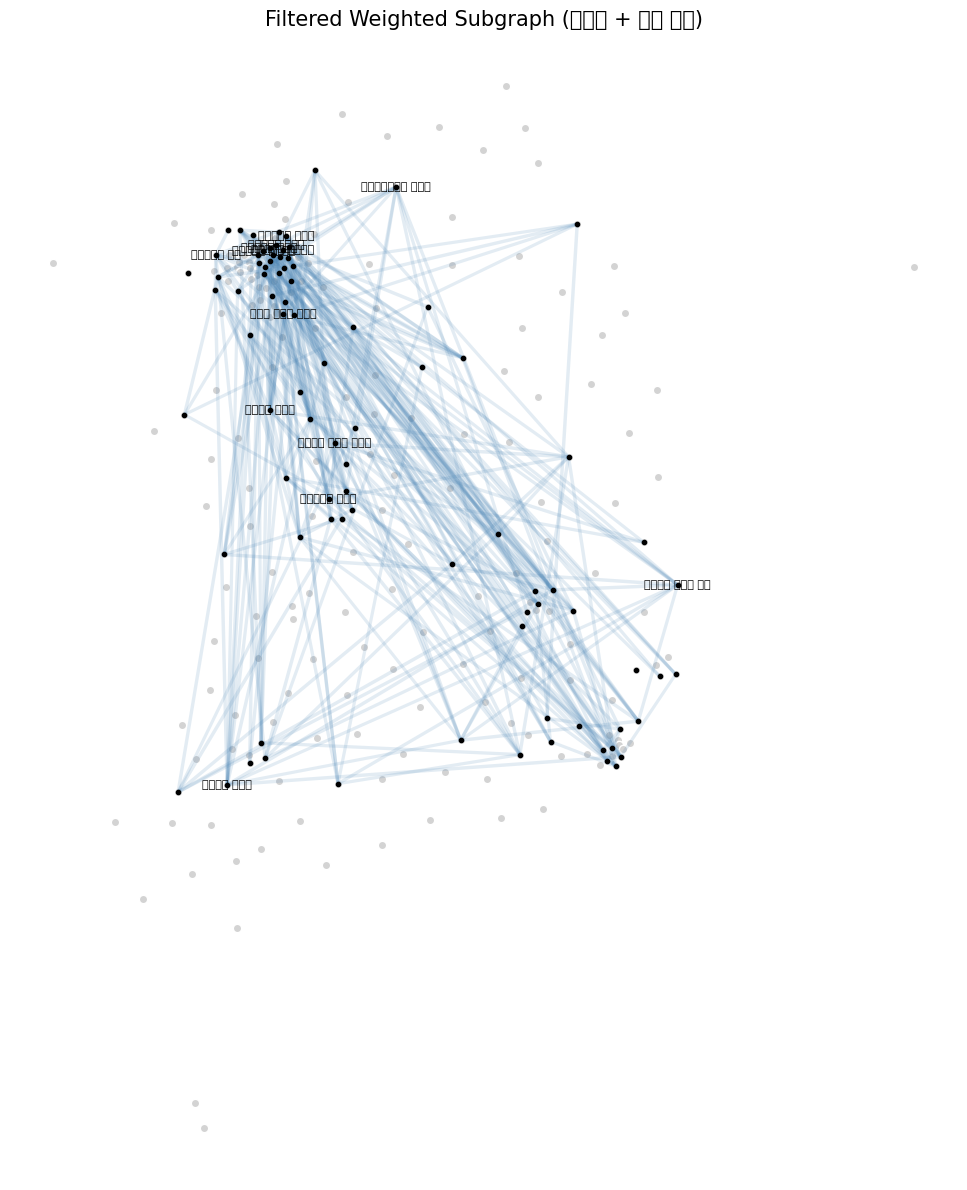

In [ ]:
import random
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import LineString, Point
import matplotlib.font_manager as fm
import networkx as nx

# Set Korean font for labels (adjust based on your OS)
plt.rcParams['font.family'] = 'AppleGothic'  # macOS
# plt.rcParams['font.family'] = 'NanumGothic'  # Linux/Windows alternative
plt.rcParams['axes.unicode_minus'] = False

# Step 1: Assign weights to edges (if not done yet)
for u, v in subgraph.edges():
    subgraph[u][v]['weight'] = round(random.uniform(1, 10), 2)

# Step 2: Build node positions
pos = {row['SGG_NM']: (row['longitude'], row['latitude']) for _, row in geo_df.iterrows()}

# Step 3: Build edge GeoDataFrame
edge_list = []
for u, v, data in subgraph.edges(data=True):
    if u in pos and v in pos:
        point_u = Point(pos[u])
        point_v = Point(pos[v])
        edge_list.append({
            'from': u,
            'to': v,
            'weight': data.get('weight', 1),
            'geometry': LineString([point_u, point_v])
        })

edges_gdf = gpd.GeoDataFrame(edge_list, crs="EPSG:4326")

# Step 4: Filter edges by weight
weight_threshold = 9.0
filtered_edges_gdf = edges_gdf[edges_gdf['weight'] >= weight_threshold]

# Step 5: Get top 15 nodes by degree for labeling
degree_dict = dict(subgraph.degree())
top_nodes = sorted(degree_dict, key=degree_dict.get, reverse=True)[:15]

# Step 6: Plot
fig, ax = plt.subplots(figsize=(12, 12))

# Optional: plot background regions
geo_df.plot(ax=ax, facecolor='lightgray', edgecolor='white')

# Plot filtered edges with transparency
filtered_edges_gdf.plot(
    ax=ax,
    linewidth=filtered_edges_gdf['weight'] / 4,  # thinner lines
    alpha=0.15,  # more transparent
    color='steelblue'
)

# Plot nodes
for node, (x, y) in pos.items():
    if node in subgraph.nodes:
        ax.plot(x, y, 'o', markersize=3, color='black')
        if node in top_nodes:  # label only top-degree nodes
            ax.text(x, y, node, fontsize=8, ha='center', va='center', color='black')

# Final formatting
ax.set_title("Filtered Weighted Subgraph (투명도 + 라벨 정리)", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()



In [ ]:
# 1. Install Nanum Gothic font
!apt-get -qq install fonts-nanum

# 2. Clear and rebuild Matplotlib font cache
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# Rebuild font cache
fm._rebuild()

# 3. Set font to NanumGothic
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(5, 2))
plt.title("한글 테스트: 서울특별시 강남구")
plt.plot([1, 2], [3, 4])
plt.show()


AttributeError: module 'matplotlib.font_manager' has no attribute '_rebuild'

#Affiliations that produced knowledge during the research period

In [ ]:
# Assuming your DataFrame is named 'aff_df' and the column containing iso3 codes is named 'iso3'
node_renaming = dict(zip(G.nodes, aff_df['SGG_NM']))

# Rename nodes in the graph 'G' using the mapping dictionary
G = nx.relabel_nodes(G, node_renaming)

node_list = aff_df['SGG_NM'].unique().tolist()
node_list

# Count by Affiliations

In [ ]:
# Assuming 'Affiliations' contains affiliations separated by ";"
affiliation_data = data['Affiliations'].tolist()

# Split affiliations and flatten the list
flat_affiliations = [affiliation.strip() for affiliations in affiliation_data for affiliation in affiliations.split(";")]

# Count affiliations using Counter
affiliation_counts = Counter(flat_affiliations)

# Convert Counter to DataFrame
count_df = pd.DataFrame.from_dict(affiliation_counts, orient='index', columns=['Count'])

# Print DataFrame
count_df = count_df.sort_values(by = 'Count', ascending = False)
count_df.head(50)

Count
Seoul National University (SNU)                      1320
Yonsei University                                     941
Korea University                                      874
Sungkyunkwan University (SKKU)                        796
Kyung Hee University                                  683
Hanyang University                                    518
Ewha Womans University                                465
Chung Ang University                                  403
Hankuk University Foreign Studies                     364
Pusan National University                             350
Korea Advanced Institute of Science & Technolog...    340
Sejong University                                     338
Sogang University                                     249
Dongguk University                                    215
Konkuk University                                     207
State University System of Florida                    199
Gachon University                                     190
Inha University                                       184
University System of Ohio                             179
Keimyung University                                   178
Jeonbuk National University                           170
Hongik University                                     157
University of California System                       154
University System of Georgia                          149
University of Texas System                            147
Kookmin University                                    142
Kyungpook National University                         138
Hong Kong Polytechnic University                      128
Pennsylvania Commonwealth System of Higher Educ...    127
Kyonggi University                                    123
Incheon National University                           123
Chonnam National University                           123
Kangwon National University                           122
Chungnam National University                          121
Dankook University                                    114
University of Illinois System                         111
Pukyong National University                           108
University of Seoul                                   108
Ulsan National Institute of Science & Technolog...    105
Soongsil University                                   101
Woosong University                                    101
Catholic University of Korea                          101
Sookmyung Women's University                           98
Ajou University                                        97
University of Wisconsin System                         96
Nanyang Technological University                       93
Yeungnam University                                    92
California State University System                     91
Texas A&M University System                            90
State University of New York (SUNY) System             90

In [ ]:
SGG_count = aff_df.groupby('SGG_NM')['Count'].sum()
SGG_count = SGG_count.sort_values(ascending=False)
SGG_count

SGG_NM
서울특별시 서대문구     66041
서울특별시 관악구      60786
서울특별시 종로구      56547
대전광역시 유성구      50453
서울특별시 성북구      42837
               ...  
경기도 이천시          252
광주광역시 남구         226
경기도 용인시 기흥구      224
서울특별시 영등포구       218
경기도 시흥시          211
Name: Count, Length: 95, dtype: int64

# Centrality Measurement

- degree centrality and betweenness centrality is measured using NetworkX

In [ ]:
deg_centrality = nx.degree_centrality(subgraph)
deg_centrality

{'전북특별차지도 전주시 완산구': 0.07446808510638298,
 '경기도 이천시': 0.13829787234042554,
 '대구광역시 달서구': 0.36170212765957444,
 '대전광역시 대덕구': 0.02127659574468085,
 '대구광역시 달성군': 0.1595744680851064,
 '인천광역시 중구': 0.07446808510638298,
 '서울특별시 서대문구': 0.6702127659574468,
 '대전광역시 서구': 0.4148936170212766,
 '광주광역시 동구': 0.28723404255319146,
 '부산광역시 기장군': 0.031914893617021274,
 '충청남도 천안시 동남구': 0.5106382978723404,
 '충청북도 제천시': 0.07446808510638298,
 '서울특별시 강남구': 0.0425531914893617,
 '전북특별차지도 전주시 덕진구': 0.32978723404255317,
 '서울특별시 서초구': 0.2553191489361702,
 '세종특별자치시': 0.26595744680851063,
 '강원특별자치도 춘천시': 0.26595744680851063,
 '경상남도 창원시 마산합포구': 0.2765957446808511,
 '충청북도 청주시 서원구': 0.06382978723404255,
 '대전광역시 유성구': 0.776595744680851,
 '대구광역시 중구': 0.18085106382978722,
 '서울특별시 중구': 0.24468085106382978,
 '전라남도 무안군': 0.10638297872340426,
 '전라남도 순천시': 0.30851063829787234,
 '전북특별차지도 익산시': 0.11702127659574468,
 '부산광역시 서구': 0.20212765957446807,
 '서울특별시 도봉구': 0.10638297872340426,
 '서울특별시 성동구': 0.48936170212765956,
 '경기도 포천시': 0

In [ ]:
# Create a DataFrame from the dictionary
df = pd.DataFrame.from_dict(deg_centrality, orient='index', columns=['Degree Centrality'])
# Sort by 'Age' in descending order
sorted_df = df.sort_values(by='Degree Centrality', ascending=False)
sorted_df[:50]

Degree Centrality
대전광역시 유성구                 0.776596
제주도 제주시                   0.734043
서울특별시 종로구                 0.712766
강원특별자치도 강릉시               0.680851
서울특별시 성북구                 0.670213
서울특별시 서대문구                0.670213
경상북도 경산시                  0.585106
서울특별시 중랑구                 0.574468
충청북도 충주시                  0.542553
서울특별시 노원구                 0.531915
경기도 수원시 영통구               0.521277
인천광역시 연수구                 0.521277
충청남도 천안시 동남구              0.510638
강원특별자치도 원주시               0.510638
서울특별시 성동구                 0.489362
전북특별차지도 완주군               0.457447
경상북도 포항시 남구               0.446809
서울특별시 동작구                 0.436170
충청북도 청주시 흥덕구              0.436170
대구광역시 북구                  0.425532
광주광역시 북구                  0.414894
부산광역시 사상구                 0.414894
대전광역시 서구                  0.414894
경기도 포천시                   0.393617
서울특별시 송파구                 0.372340
경기도 고양시 일산서구              0.361702
부산광역시 남구                  0.361702
대구광역시 달서구                 0.361702
서울특별시 동대문구                0.361702
대전광역시 동구                  0.340426
경기도 고양시 일산동구              0.340426
전북특별차지도 전주시 덕진구           0.329787
전라남도 순천시                  0.308511
충청남도 논산시                  0.308511
전북특별차지도 군산시               0.297872
광주광역시 동구                  0.287234
서울특별시 영등포구                0.276596
경상남도 창원시 마산합포구            0.276596
경기도 고양시 덕양구               0.276596
서울특별시 마포구                 0.276596
강원특별자치도 춘천시               0.265957
부산광역시 영도구                 0.265957
세종특별자치시                   0.265957
인천광역시 미추홀구                0.265957
충청남도 서산시                  0.255319
서울특별시 서초구                 0.255319
서울특별시 광진구                 0.244681
서울특별시 중구                  0.244681
충청남도 공주시                  0.234043
경상북도 김천시                  0.223404

In [ ]:
deg_df = sorted_df.reset_index()
deg_df = deg_df.rename({'index': 'SGG_NM'}, axis=1)
deg_df

SGG_NM  Degree Centrality
0     대전광역시 유성구           0.776596
1       제주도 제주시           0.734043
2     서울특별시 종로구           0.712766
3   강원특별자치도 강릉시           0.680851
4     서울특별시 성북구           0.670213
..          ...                ...
90    부산광역시 기장군           0.031915
91     울산광역시 동구           0.031915
92    대전광역시 대덕구           0.021277
93      경기도 의왕시           0.021277
94     제주도 서귀포시           0.010638

[95 rows x 2 columns]

In [ ]:
sorted_df.to_csv("degree centrality(social).csv")

In [ ]:
df.describe()

Degree Centrality
count          95.000000
mean            0.526764
std             0.258826
min             0.010638
25%             0.319149
50%             0.585106
75%             0.723404
max             0.946809

In [ ]:
import networkx as nx

# Assuming you have a graph 'G' with a node named 'A'

# Calculate betweenness centrality with a sample of 100 shortest paths
betweenness = nx.betweenness_centrality(subgraph)

betweenness

{'경기도 포천시': 7.775377514346231e-06,
 '충청북도 청주시 청원구': 0.0037367096245306763,
 '세종특별자치시': 4.236677766762416e-06,
 '울산광역시 울주군': 0.024997373761217856,
 '전라남도 나주시': 0.008757155173535645,
 '서울특별시 노원구': 0.026576205885110678,
 '경상남도 창원시 마산합포구': 0.0007501136839450249,
 '전라남도 무안군': 0.0017237352736697434,
 '대구광역시 동구': 0.0015643817056863899,
 '대구광역시 북구': 0.021276595744680847,
 '부산광역시 서구': 0.003389390401241677,
 '충청남도 논산시': 0.012027212694706156,
 '서울특별시 송파구': 0.00014813677133512413,
 '경기도 고양시 덕양구': 0.01094580338992022,
 '전북특별차지도 익산시': 0.002874623899505461,
 '충청남도 서산시': 0.0013812237345380816,
 '경기도 화성시': 0.0044222154687710395,
 '경기도 이천시': 0.0011493261529061025,
 '부산광역시 부산진구': 0.0008062081050359591,
 '경기도 시흥시': 0.001386293852959942,
 '경상북도 포항시 남구': 0.0056502324006971775,
 '대전광역시 서구': 0.014950090883586056,
 '경기도 고양시 일산동구': 0.0006876092356667337,
 '울산광역시 동구': 0.0,
 '광주광역시 동구': 0.0080115069943484,
 '광주광역시 남구': 0.001545797558577032,
 '부산광역시 사상구': 5.0985390724580844e-05,
 '서울특별시 마포구': 0.0026567270908912457

In [ ]:
# Create a DataFrame
bet_df = pd.DataFrame.from_dict(betweenness, orient='index', columns=['Betweenness Centrality'])

# Format decimals with f-string formatting
bet_df['Betweenness Centrality'] = bet_df['Betweenness Centrality'].apply(lambda x: f"{x:.5f}")

# rename the column
bet_df = bet_df.reset_index()
bet_df = bet_df.rename({'index': 'SGG_NM'}, axis=1)
bet_df

# Print the DataFrame
bet_df = bet_df.sort_values(by = 'Betweenness Centrality', ascending = False).head(500)
bet_df[:50]

SGG_NM Betweenness Centrality
59        대전광역시 유성구                0.02956
90        서울특별시 종로구                0.02682
5         서울특별시 노원구                0.02658
89      전북특별차지도 완주군                0.02508
3         울산광역시 울주군                0.02500
9          대구광역시 북구                0.02128
28      경기도 수원시 영통구                0.02088
46         경상남도 진주시                0.01885
35     충청남도 천안시 동남구                0.01638
21         대전광역시 서구                0.01495
55       서울특별시 동대문구                0.01331
40       서울특별시 서대문구                0.01258
11         충청남도 논산시                0.01203
36        서울특별시 성북구                0.01174
13      경기도 고양시 덕양구                0.01095
42        부산광역시 영도구                0.01028
65       인천광역시 미추홀구                0.00947
72        서울특별시 중랑구                0.00882
4          전라남도 나주시                0.00876
34      강원특별자치도 원주시                0.00853
30     충청북도 청주시 서원구                0.00832
24         광주광역시 동구                0.00801
31        서울특별시 성동구                0.00735
63  전북특별차지도 전주시 완산구                0.00703
48         경상북도 경산시                0.00649
20      경상북도 포항시 남구                0.00565
52     충청북도 청주시 흥덕구                0.00516
16          경기도 화성시                0.00442
54     경기도 고양시 일산서구                0.00422
78       서울특별시 영등포구                0.00387
1      충청북도 청주시 청원구                0.00374
81         인천광역시 서구                0.00372
94        서울특별시 서초구                0.00342
10         부산광역시 서구                0.00339
60      강원특별자치도 강릉시                0.00336
61        서울특별시 용산구                0.00336
87          경기도 의왕시                0.00333
39          경기도 안성시                0.00305
14      전북특별차지도 익산시                0.00287
80        서울특별시 도봉구                0.00281
51        인천광역시 연수구                0.00276
27        서울특별시 마포구                0.00266
38         대전광역시 동구                0.00255
67         서울특별시 중구                0.00235
41         충청남도 아산시                0.00226
92         경상북도 안동시                0.00221
33        대전광역시 대덕구                0.00209
68        대구광역시 달서구                0.00184
85      경상북도 포항시 북구                0.00175
57        서울특별시 동작구                0.00173

In [ ]:
bet_df.to_csv("./betweenness_centrality(all).csv")

# Gini Coefficient

In [ ]:
! pip install inequality

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 23.7 MB/s eta 0:00:00


In [ ]:
! pip install libpysal

In [ ]:
import sys
import os
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('..'))
import inequality
import libpysal

In [ ]:
import geopandas as gpd
pth = "/content/drive/MyDrive/지식 다중심성 /aff_S_df/aff_S_df.shp"
gdf = gpd.read_file(pth)

from libpysal.weights import Queen, Rook, KNN

In [ ]:
gdf_0.head()

ADM_SECT_C     SGG_NM  SGG_OID COL_ADM_SE    Shape_Leng    Shape_Area  \
0      11110  서울특별시 종로구       11      11110  28513.149104  2.399337e+07   
1      11140   서울특별시 중구       34      11140  18615.003957  9.968960e+06   
2      11170  서울특별시 용산구        1      11170  21062.681974  2.192101e+07   
3      11200  서울특별시 성동구        1      11200  19226.436637  1.680184e+07   
4      11215  서울특별시 광진구       49      11215  18522.110833  1.706241e+07   

   Between aff_S_df_f  aff_S_df_C  \
0        0          2       56547   
1        0         23        6979   
2        0         52        1677   
3        0          6       17902   
4        0          7       17076   

                                            geometry  
0  POLYGON ((197799.999 559069.694, 197785.848 55...  
1  POLYGON ((202072.448 552243.432, 202072.646 55...  
2  POLYGON ((197569.650 550564.919, 197580.635 55...  
3  POLYGON ((203845.364 552528.281, 203846.364 55...  
4  POLYGON ((208984.357 552552.194, 209038.174 55...

In [ ]:
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq: http://www.statsdirect.com/help/content/image/stat0206_wmf.gif
    # from: http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    array = array.flatten() #all values are treated equally, arrays must be 1d
    if np.amin(array) < 0:
        array -= np.amin(array) #values cannot be negative
    array += 0.0000001 #values cannot be 0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) #index per array element
    n = array.shape[0]#number of array elements
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) #Gini coefficient

In [ ]:
gdf_0.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ADM_SECT_C  252 non-null    object  
 1   SGG_NM      252 non-null    object  
 2   SGG_OID     252 non-null    int64   
 3   COL_ADM_SE  252 non-null    object  
 4   Shape_Leng  252 non-null    float64 
 5   Shape_Area  252 non-null    float64 
 6   Between     252 non-null    int64   
 7   aff_S_df_f  252 non-null    object  
 8   aff_S_df_C  252 non-null    int64   
 9   geometry    252 non-null    geometry
dtypes: float64(2), geometry(1), int64(3), object(4)
memory usage: 19.8+ KB


In [ ]:
gdf_0['aff_S_df_C'] = gdf_0['aff_S_df_C'].astype(float)

In [ ]:
import numpy as np

# Get the desired column as a NumPy array
aff_S_df_C_array = gdf_0["aff_S_df_C"].to_numpy()

# Print the array (optional)
print(aff_S_df_C_array)

# Calculate the Gini coefficient
gini_value = gini(aff_S_df_C_array)

# Print the Gini coefficient
print("Gini Coefficient:", gini_value)

[56547.  6979.  1677. 17902. 17076. 24545.   269. 42837.     0.   416.
  6656.     0. 66041.  4739.     0.     0.     0.     0.   218. 15435.
 60786.  3984. 11257.  6082.     0.     0.  7148.     0.  2947.   905.
     0.  5667.     0.     0.     0. 16622.     0.     0.     0.   646.
   659.  1173.   391.     0.  5667. 15723.     0.  3130.  2386.     0.
   649.     0.  6812.  4559.     0.     0.     0.  1069.     0.     0.
  4845.     0.   226. 15342.     0.  1031.  3137.   834. 50453.   568.
     0. 14870.  1108.     0.  5719.   262.     0.     0.     0. 14205.
  8096.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.   211.     0.   352.     0.     0.   224.  4876.
   252.   879.     0.     0.     0.     0.     0.     0.     0.     0.
  1185.  3920.  1037.     0.  3366.     0.   450.     0.     0.     0.
     0.  7456.  2097.   520.  1316.   432.     0.     0.     0.     0.
     0.     0.     0.     0.  1684.  2619.  2528.     0.  6159.   333.
  1226

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def lorenz_curve(array):
  """
  Calculates and plots the Lorenz curve for a given array.

  Args:
      array: A NumPy array of values.

  Returns:
      None (plots the Lorenz curve)
  """
  gini_coefficient = gini(array.copy())  # Avoid modifying original array

  # Sort the array
  sorted_array = np.sort(array)

  # Calculate the Lorenz Curve (cumulative sum divided by total sum)
  lorenz_y = sorted_array.cumsum() / sorted_array.sum()

  # Percentage of population (X-axis)
  population_pct = np.linspace(0, 100, len(lorenz_y))

  # Plot Lorenz Curve (blue) and Perfect Equality Line (green)
  plt.plot(population_pct, lorenz_y, label='Lorenz Curve', color='blue')
  plt.plot([0, 100], [0, 100], label='Perfect Equality', color='green', linestyle='--')

  # Add labels, title, and legend
  plt.xlabel('Percentage of Population (%)')
  plt.ylabel('Percentage of Income (%)')
  plt.title('Lorenz Curve (Gini Coefficient: {:.2f})'.format(gini_coefficient))
  plt.legend()

  # Display the plot
  plt.grid(True)
  plt.show()

# Example usage (assuming you have your data in an array named 'data')
lorenz_curve(data.copy())  # Avoid modifying original data

# Chord Diagram

In [ ]:
! pip install d3blocks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 8.4 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.5
    Uninstalling MarkupSafe-2.1.5:
      Successfully uninstalled MarkupSafe-2.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.0+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-nvrtc-cu

In [ ]:
import pandas as pd

# Extract nodes and edges from the graph
nodes = list(subgraph.nodes())
edges = subgraph.edges(data=True)  # Get edges with data (weight)

# Create empty lists for data
source = []
target = []
weight = []

# Loop through edges and extract data
for edge in edges:
  source.append(edge[0])
  target.append(edge[1])
  # Access weight using index (assuming weight is at index 2)
  weight.append(edge[2] if len(edge) > 2 else 1)  # Check edge length and assign weight/default

# Create the DataFrame
df = pd.DataFrame({
  "source": source,
  "target": target,
  "weight": weight
})



# Assuming your DataFrame is named 'df'
def extract_weight(weight_dict):
  # Check if weight key exists and return its value, otherwise return 0 (or a default value)
  return weight_dict.get('weight', 0)

df["weight"] = df["weight"].apply(extract_weight)


print(df)



            source      target  weight
0     경기도 고양시 일산동구   서울특별시 관악구       6
1     경기도 고양시 일산동구  서울특별시 서대문구     125
2     경기도 고양시 일산동구   서울특별시 종로구       4
3     경기도 고양시 일산동구   서울특별시 성북구       4
4     경기도 고양시 일산동구   서울특별시 성동구       2
...            ...         ...     ...
2818  충청북도 청주시 서원구    대전광역시 동구       2
2819      대전광역시 동구   부산광역시 영도구      53
2820      대전광역시 동구    대전광역시 동구     371
2821     부산광역시 영도구   부산광역시 영도구       4
2822      광주광역시 남구    광주광역시 남구     105

[2823 rows x 3 columns]


In [ ]:
import pandas as pd


import networkx as nx

def get_edges_from_graph(subgraph):
  # Extract edges and their weights (assuming weight is an edge attribute)
  return [(u, v, d['weight']) for u, v, d in subgraph.edges(data=True)]



# Assuming you have a way to access edges and their weights from graph G
edges = get_edges_from_graph(subgraph)  # Replace with your method to get edges

# Create the DataFrame with edge information
df = pd.DataFrame(edges, columns=['source', 'target', 'weight'])

# Check the DataFrame
df


source      target  weight
0     경기도 고양시 일산동구   서울특별시 관악구       6
1     경기도 고양시 일산동구  서울특별시 서대문구     125
2     경기도 고양시 일산동구   서울특별시 종로구       4
3     경기도 고양시 일산동구   서울특별시 성북구       4
4     경기도 고양시 일산동구   서울특별시 성동구       2
...            ...         ...     ...
2818  충청북도 청주시 서원구    대전광역시 동구       2
2819      대전광역시 동구   부산광역시 영도구      53
2820      대전광역시 동구    대전광역시 동구     371
2821     부산광역시 영도구   부산광역시 영도구       4
2822      광주광역시 남구    광주광역시 남구     105

[2823 rows x 3 columns]

In [ ]:
df[df['source'] == '충청남도 서산시']

source           target  weight
2057  충청남도 서산시       서울특별시 서대문구     275
2058  충청남도 서산시        서울특별시 성동구     299
2059  충청남도 서산시        부산광역시 금정구      16
2060  충청남도 서산시  전북특별차지도 전주시 덕진구     387
2061  충청남도 서산시         경상남도 진주시       6
2062  충청남도 서산시         경상북도 경산시      46
2063  충청남도 서산시      경기도 성남시 수정구       4
2064  충청남도 서산시      강원특별자치도 춘천시       3
2065  충청남도 서산시       인천광역시 미추홀구     201
2066  충청남도 서산시         서울특별시 중구     130
2067  충청남도 서산시        서울특별시 송파구     154
2068  충청남도 서산시      전북특별차지도 익산시      19
2069  충청남도 서산시         충청남도 공주시      20
2070  충청남도 서산시         대전광역시 중구     164
2071  충청남도 서산시        서울특별시 마포구       5
2072  충청남도 서산시        부산광역시 영도구       2
2073  충청남도 서산시         경상북도 구미시     127
2074  충청남도 서산시        서울특별시 용산구       6
2075  충청남도 서산시     경상남도 창원시 성산구      44
2076  충청남도 서산시      전북특별차지도 군산시     354
2077  충청남도 서산시         전라남도 무안군       1
2078  충청남도 서산시      강원특별자치도 원주시       3
2079  충청남도 서산시          경기도 안성시       6
2080  충청남도 서산시      경기도 고양시 덕양구      23
2081  충청남도 서산시     충청남도 천안시 동남구      10
2082  충청남도 서산시        부산광역시 기장군       1
2083  충청남도 서산시         대전광역시 동구     166
2084  충청남도 서산시   경상남도 창원시 마산합포구       8
2085  충청남도 서산시         충청북도 제천시       1
2086  충청남도 서산시        서울특별시 도봉구     254
2087  충청남도 서산시         대구광역시 동구     352
2088  충청남도 서산시          경기도 의왕시     285
2089  충청남도 서산시         충청남도 서천군     132
2090  충청남도 서산시        부산광역시 사상구       1
2091  충청남도 서산시         충청남도 서산시    2405
2092  충청남도 서산시         전라남도 나주시     602
2093  충청남도 서산시          세종특별자치시     274
2094  충청남도 서산시        서울특별시 관악구       1
2095  충청남도 서산시       서울특별시 영등포구       2
2096  충청남도 서산시         제주도 서귀포시       1
2097  충청남도 서산시      경기도 용인시 기흥구       1

In [ ]:
import pandas as pd
from collections import defaultdict  # To keep track of connection counts

# Assuming you have a way to access edges from graph G
edges = get_edges_from_graph(G)

# Count connections between nodes
connection_counts = defaultdict(int)
for edge in edges:
    connection_counts[(edge[0], edge[1])] += 1

# Create the DataFrame with connection counts as weight
df = pd.DataFrame([
    (edge[0], edge[1], connection_counts[(edge[0], edge[1])])
    for edge in edges
], columns=['source', 'target', 'weight'])

# Check the DataFrame
print(df.head())


      source                target  weight
0  서울특별시 관악구            서울특별시 서대문구       1
1  서울특별시 관악구           전북특별차지도 완주군       1
2  서울특별시 관악구   Carleton University       1
3  서울특별시 관악구              경상북도 안동시       1
4  서울특별시 관악구             대전광역시 유성구       1


# SNA Results (data preprocessing)

In [ ]:
merged_between = gpd.read_file("/content/drive/MyDrive/지식 다중심성 /merged betweenness/SGG_betweenness(merged).shp")
merged_between

ADM_SECT_C       SGG_NM  SGG_OID COL_ADM_SE     Shape_Leng    Shape_Area  \
0        11110    서울특별시 종로구       11      11110   28513.149104  2.399337e+07   
1        11140     서울특별시 중구       34      11140   18615.003957  9.968960e+06   
2        11170    서울특별시 용산구        1      11170   21062.681974  2.192101e+07   
3        11200    서울특별시 성동구        1      11200   19226.436637  1.680184e+07   
4        11215    서울특별시 광진구       49      11215   18522.110833  1.706241e+07   
..         ...          ...      ...        ...            ...           ...   
247      52740  전북특별차지도 장수군        1      52740  156286.255608  5.322004e+08   
248      52750  전북특별차지도 임실군        1      52750  166295.430782  5.968075e+08   
249      52770  전북특별차지도 순창군        1      52770  177262.640294  5.005543e+08   
250      52790  전북특별차지도 고창군        1      52790  191068.395574  6.114434e+08   
251      52800  전북특별차지도 부안군        2      52800  297715.524306  4.910990e+08   

     Between betweennes betweenn_1 betweenn_2 betweenn_3 betweenn_4  \
0        NaN    0.05452    0.02241    0.04918    0.08330    0.01637   
1        NaN    0.01933    0.03128    0.03051    0.00368    0.00223   
2        NaN    0.00074    0.00191    0.00293    0.00499    0.01526   
3        NaN    0.02542    0.01294    0.00104    0.00000    0.00674   
4        NaN    0.00156    0.02756    0.00511    0.00454    0.00220   
..       ...        ...        ...        ...        ...        ...   
247      NaN       None       None       None       None       None   
248      NaN       None       None       None       None       None   
249      NaN       None       None       None       None       None   
250      NaN       None       None       None       None       None   
251      NaN       None       None       None       None       None   

    betweenn_5 betweenn_6 betweenn_7 betweenn_8  \
0      0.00889    0.01900    0.05957    0.03292   
1      0.00727    0.00406    0.00322    0.00529   
2      0.00617    0.00255    0.00059    0.00205   
3      0.00527    0.01120    0.03595    0.02377   
4      0.00309    0.00578    0.00274    0.00609   
..         ...        ...        ...        ...   
247       None       None       None       None   
248       None       None       None       None   
249       None       None       None       None   
250       None       None       None       None   
251       None       None       None       None   

                                              geometry  
0    POLYGON ((197799.999 559069.694, 197785.848 55...  
1    POLYGON ((202072.448 552243.432, 202072.646 55...  
2    POLYGON ((197569.65 550564.919, 197580.635 550...  
3    POLYGON ((203845.364 552528.281, 203846.364 55...  
4    POLYGON ((208984.357 552552.194, 209038.174 55...  
..                                                 ...  
247  POLYGON ((256011.688 360351.273, 256011.897 36...  
248  POLYGON ((224281.494 353391.558, 224292.085 35...  
249  POLYGON ((197938.527 328740.842, 197987.427 32...  
250  MULTIPOLYGON (((148090.678 316072.917, 148089....  
251  MULTIPOLYGON (((141680.858 329349.135, 141679....  

[252 rows x 17 columns]

In [ ]:
merged_between = merged_between.rename(columns={
    'betweenness': 'applied',
    'betweenn_1': 'Arts',
    'betweenn_2': 'Convergent',
    'betweenn_3': 'Human',
    'betweenn_4': 'Biosci&biomed',
    'betweenn_5': 'all',
    'betweenn_6': 'Physical_science',
    'betweenn_7': 'Social',
    'betweenn_8': 'Tech'
})

merged_between

ADM_SECT_C       SGG_NM  SGG_OID COL_ADM_SE     Shape_Leng    Shape_Area  \
0        11110    서울특별시 종로구       11      11110   28513.149104  2.399337e+07   
1        11140     서울특별시 중구       34      11140   18615.003957  9.968960e+06   
2        11170    서울특별시 용산구        1      11170   21062.681974  2.192101e+07   
3        11200    서울특별시 성동구        1      11200   19226.436637  1.680184e+07   
4        11215    서울특별시 광진구       49      11215   18522.110833  1.706241e+07   
..         ...          ...      ...        ...            ...           ...   
247      52740  전북특별차지도 장수군        1      52740  156286.255608  5.322004e+08   
248      52750  전북특별차지도 임실군        1      52750  166295.430782  5.968075e+08   
249      52770  전북특별차지도 순창군        1      52770  177262.640294  5.005543e+08   
250      52790  전북특별차지도 고창군        1      52790  191068.395574  6.114434e+08   
251      52800  전북특별차지도 부안군        2      52800  297715.524306  4.910990e+08   

     Between betweennes     Arts Convergent    Human Biosci&biomed      all  \
0        NaN    0.05452  0.02241    0.04918  0.08330       0.01637  0.00889   
1        NaN    0.01933  0.03128    0.03051  0.00368       0.00223  0.00727   
2        NaN    0.00074  0.00191    0.00293  0.00499       0.01526  0.00617   
3        NaN    0.02542  0.01294    0.00104  0.00000       0.00674  0.00527   
4        NaN    0.00156  0.02756    0.00511  0.00454       0.00220  0.00309   
..       ...        ...      ...        ...      ...           ...      ...   
247      NaN       None     None       None     None          None     None   
248      NaN       None     None       None     None          None     None   
249      NaN       None     None       None     None          None     None   
250      NaN       None     None       None     None          None     None   
251      NaN       None     None       None     None          None     None   

    Physical_science   Social     Tech  \
0            0.01900  0.05957  0.03292   
1            0.00406  0.00322  0.00529   
2            0.00255  0.00059  0.00205   
3            0.01120  0.03595  0.02377   
4            0.00578  0.00274  0.00609   
..               ...      ...      ...   
247             None     None     None   
248             None     None     None   
249             None     None     None   
250             None     None     None   
251             None     None     None   

                                              geometry  
0    POLYGON ((197799.999 559069.694, 197785.848 55...  
1    POLYGON ((202072.448 552243.432, 202072.646 55...  
2    POLYGON ((197569.65 550564.919, 197580.635 550...  
3    POLYGON ((203845.364 552528.281, 203846.364 55...  
4    POLYGON ((208984.357 552552.194, 209038.174 55...  
..                                                 ...  
247  POLYGON ((256011.688 360351.273, 256011.897 36...  
248  POLYGON ((224281.494 353391.558, 224292.085 35...  
249  POLYGON ((197938.527 328740.842, 197987.427 32...  
250  MULTIPOLYGON (((148090.678 316072.917, 148089....  
251  MULTIPOLYGON (((141680.858 329349.135, 141679....  

[252 rows x 17 columns]

In [ ]:
merged_between.to_file("merged_between(new).shp")

<ipython-input-21-1c26b622aa6d>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged_between.to_file("merged_between(new).shp")
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Biosci&biomed' to 'Biosci&bio'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Physical_science' to 'Physical_s'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 184371337.611999989 of field Shape_Area of feature 36 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 219647983.784999967 of field Shape_Area of feature 40 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.11/di

In [ ]:
merged_degree = gpd.read_file("/content/drive/MyDrive/지식 다중심성 /merged degree/SGG_degree(merged).shp")
merged_degree

ADM_SECT_C       SGG_NM  SGG_OID COL_ADM_SE     Shape_Leng    Shape_Area  \
0        11110    서울특별시 종로구       11      11110   28513.149104  2.399337e+07   
1        11140     서울특별시 중구       34      11140   18615.003957  9.968960e+06   
2        11170    서울특별시 용산구        1      11170   21062.681974  2.192101e+07   
3        11200    서울특별시 성동구        1      11200   19226.436637  1.680184e+07   
4        11215    서울특별시 광진구       49      11215   18522.110833  1.706241e+07   
..         ...          ...      ...        ...            ...           ...   
247      52740  전북특별차지도 장수군        1      52740  156286.255608  5.322004e+08   
248      52750  전북특별차지도 임실군        1      52750  166295.430782  5.968075e+08   
249      52770  전북특별차지도 순창군        1      52770  177262.640294  5.005543e+08   
250      52790  전북특별차지도 고창군        1      52790  191068.395574  6.114434e+08   
251      52800  전북특별차지도 부안군        2      52800  297715.524306  4.910990e+08   

     Between           degree cen           degree c_1           degree c_2  \
0        NaN   0.5106382978723404   0.1702127659574468   0.7978723404255319   
1        NaN   0.3404255319148936  0.09574468085106383   0.6702127659574468   
2        NaN   0.2765957446808511   0.0425531914893617  0.36170212765957444   
3        NaN  0.48936170212765956   0.0851063829787234  0.18085106382978722   
4        NaN   0.0851063829787234   0.1702127659574468  0.44680851063829785   
..       ...                  ...                  ...                  ...   
247      NaN                 None                 None                 None   
248      NaN                 None                 None                 None   
249      NaN                 None                 None                 None   
250      NaN                 None                 None                 None   
251      NaN                 None                 None                 None   

              degree c_3          degree c_4           degree c_5  \
0     0.2978723404255319  0.9148936170212766   0.9042553191489362   
1    0.06382978723404255  0.7127659574468085   0.7659574468085106   
2    0.07446808510638298  0.9148936170212766  0.48936170212765956   
3    0.02127659574468085  0.8297872340425532   0.8404255319148936   
4    0.18085106382978722   0.648936170212766    0.776595744680851   
..                   ...                 ...                  ...   
247                 None                None                 None   
248                 None                None                 None   
249                 None                None                 None   
250                 None                None                 None   
251                 None                None                 None   

              degree c_6           degree c_7          degree_cen  \
0     0.7127659574468085   0.7127659574468085  0.9042553191489362   
1    0.24468085106382978  0.24468085106382978  0.8617021276595744   
2    0.11702127659574468  0.11702127659574468  0.8723404255319148   
3    0.48936170212765956  0.48936170212765956  0.8723404255319148   
4    0.24468085106382978  0.24468085106382978  0.6808510638297872   
..                   ...                  ...                 ...   
247                 None                 None                None   
248                 None                 None                None   
249                 None                 None                None   
250                 None                 None                None   
251                 None                 None                None   

                                              geometry  
0    POLYGON ((197799.999 559069.694, 197785.848 55...  
1    POLYGON ((202072.448 552243.432, 202072.646 55...  
2    POLYGON ((197569.65 550564.919, 197580.635 550...  
3    POLYGON ((203845.364 552528.281, 203846.364 55...  
4    POLYGON ((208984.357 552552.194, 209038.174 55...  
..                                                 ...  
247  POLYGON ((256011.688 360351.273,

In [ ]:
merged_degree = merged_degree.rename(columns={
    'degree cen': 'applied',
    'degree c_1': 'Arts',
    'degree c_2': 'Convergent',
    'degree c_3': 'Human',
    'degree c_4': 'Biosci&biomed',
    'degree c_5': 'all',
    'degree c_6': 'Physical_science',
    'degree c_7': 'Social',
    'degree c_8': 'Tech'
})

merged_degree

ADM_SECT_C       SGG_NM  SGG_OID COL_ADM_SE     Shape_Leng    Shape_Area  \
0        11110    서울특별시 종로구       11      11110   28513.149104  2.399337e+07   
1        11140     서울특별시 중구       34      11140   18615.003957  9.968960e+06   
2        11170    서울특별시 용산구        1      11170   21062.681974  2.192101e+07   
3        11200    서울특별시 성동구        1      11200   19226.436637  1.680184e+07   
4        11215    서울특별시 광진구       49      11215   18522.110833  1.706241e+07   
..         ...          ...      ...        ...            ...           ...   
247      52740  전북특별차지도 장수군        1      52740  156286.255608  5.322004e+08   
248      52750  전북특별차지도 임실군        1      52750  166295.430782  5.968075e+08   
249      52770  전북특별차지도 순창군        1      52770  177262.640294  5.005543e+08   
250      52790  전북특별차지도 고창군        1      52790  191068.395574  6.114434e+08   
251      52800  전북특별차지도 부안군        2      52800  297715.524306  4.910990e+08   

     Between              applied                 Arts           Convergent  \
0        NaN   0.5106382978723404   0.1702127659574468   0.7978723404255319   
1        NaN   0.3404255319148936  0.09574468085106383   0.6702127659574468   
2        NaN   0.2765957446808511   0.0425531914893617  0.36170212765957444   
3        NaN  0.48936170212765956   0.0851063829787234  0.18085106382978722   
4        NaN   0.0851063829787234   0.1702127659574468  0.44680851063829785   
..       ...                  ...                  ...                  ...   
247      NaN                 None                 None                 None   
248      NaN                 None                 None                 None   
249      NaN                 None                 None                 None   
250      NaN                 None                 None                 None   
251      NaN                 None                 None                 None   

                   Human       Biosci&biomed                  all  \
0     0.2978723404255319  0.9148936170212766   0.9042553191489362   
1    0.06382978723404255  0.7127659574468085   0.7659574468085106   
2    0.07446808510638298  0.9148936170212766  0.48936170212765956   
3    0.02127659574468085  0.8297872340425532   0.8404255319148936   
4    0.18085106382978722   0.648936170212766    0.776595744680851   
..                   ...                 ...                  ...   
247                 None                None                 None   
248                 None                None                 None   
249                 None                None                 None   
250                 None                None                 None   
251                 None                None                 None   

        Physical_science               Social          degree_cen  \
0     0.7127659574468085   0.7127659574468085  0.9042553191489362   
1    0.24468085106382978  0.24468085106382978  0.8617021276595744   
2    0.11702127659574468  0.11702127659574468  0.8723404255319148   
3    0.48936170212765956  0.48936170212765956  0.8723404255319148   
4    0.24468085106382978  0.24468085106382978  0.6808510638297872   
..                   ...                  ...                 ...   
247                 None                 None                None   
248                 None                 None                None   
249                 None                 None                None   
250                 None                 None                None   
251                 None                 None                None   

                                              geometry  
0    POLYGON ((197799.999 559069.694, 197785.848 55...  
1    POLYGON ((202072.448 552243.432, 202072.646 55...  
2    POLYGON ((197569.65 550564.919, 197580.635 550...  
3    POLYGON ((203845.364 552528.281, 203846.364 55...  
4    POLYGON ((208984.357 552552.194, 209038.174 55...  
..                                                 ...  
247  POLYGON ((256011.688 360351.273,

In [ ]:
merged_degree.to_file("merged_degree(new).shp")

<ipython-input-24-b1c871993f1d>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged_degree.to_file("merged_degree(new).shp")
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Biosci&biomed' to 'Biosci&bio'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Physical_science' to 'Physical_s'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 184371337.611999989 of field Shape_Area of feature 36 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Value 219647983.784999967 of field Shape_Area of feature 40 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/usr/local/lib/python3.11/dist

In [ ]:
aff_df = pd.read_csv("/content/drive/MyDrive/south korea data/affiliations worldwide.csv")
aff_df.rename(columns={'Affiliatio': 'Affiliations'}, inplace=True)
aff_df

Affiliations  Count  \
0                      Seoul National University (SNU)  60557   
1                                    Yonsei University  37565   
2                       Sungkyunkwan University (SKKU)  29980   
3                                     Korea University  25049   
4                      Yonsei University Health System  19488   
..                                                 ...    ...   
859                          Taipei Medical University    201   
860                           Air University Islamabad    201   
861        University of Management & Technology (UMT)    201   
862                      Texas State University System    200   
863  Ho Chi Minh City University of Technology (HCM...    200   

                                               address   Latitude   Longitude  \
0                                      서울특별시 관악구 관악로 1  37.480967  126.953148   
1                                    서울특별시 서대문구 연세로 50  37.564699  126.939497   
2                                  서울특별시 종로구 성균관로 25-2  37.588392  126.992215   
3                                    서울특별시 성북구 안암로 145  37.588750  127.032374   
4                                  서울특별시 서대문구 연세로 50-1  37.564699  126.939497   
..                                                 ...        ...         ...   
859  No. 250號, Wuxing St, Xinyi District, Taipei Ci...  25.025756  121.561691   
860  Service Road E-9 / E-8, Islamabad, Pakistan, E...  33.719698   73.024617   
861  C-II 블럭 C 2 페이즈 1 Johar Town, Lahore, 라호르, 펀자브...  31.460249   74.293973   
862               601 Colorado St, Austin, TX 78701 미국  30.268714  -97.743806   
863  268 Lý Thường Kiệt, Phường 14, Quận 10, Thành ...  10.772603  106.657698   

    iso3        status color_code                      name continent  \
0    KOR  Member State        KOR         Republic of Korea      Asia   
1    KOR  Member State        KOR         Republic of Korea      Asia   
2    KOR  Member State        KOR         Republic of Korea      Asia   
3    KOR  Member State        KOR         Republic of Korea      Asia   
4    KOR  Member State        KOR         Republic of Korea      Asia   
..   ...           ...        ...                       ...       ...   
859  TWN   CN Province        CHN                    Taiwan      Asia   
860  PAK  Member State        PAK                  Pakistan      Asia   
861  PAK  Member State        PAK                  Pakistan      Asia   
862  USA  Member State        USA  United States of America  Americas   
863  VNM  Member State        VNM                   Vietnam      Asia   

                 region iso_3166_1             french_sho  
0          Eastern Asia         KR    République de Corée  
1          Eastern Asia         KR    République de Corée  
2          Eastern Asia         KR    République de Corée  
3          Eastern Asia         KR    République de Corée  
4          Eastern Asia         KR    République de Corée  
..                  ...        ...                    ...  
859        Eastern Asia         TW                 Taiwan  
860       Southern Asia         PK               Pakistan  
861       Southern Asia         PK               Pakistan  
862    Northern America         US  États-Unis d'Amérique  
863  South-Eastern Asia         VN               Viet Nam  

[864 rows x 13 columns]